# Image processing

In the first two excercises (Homography #1 and #2) you will learn how to work with homography within the opencv library and how to use it in further image processing.

In the third excercise (Homography #3), the whole process is extended by another step, which will be a combination of the original image and the image aligned using homography. Using this step, you will learn how to easily modify images, much like video call applications (such as Facebook Messenger, Instagram, Snapchat, etc) do when various effects (sunglasses, hats, and so on) are added to the video.

In the last excercise (Homography #4) you will use the same steps to place your own photo to a picture with a TV so that the resulting picture looks as realistic as possible.

## Imports & data

In [4]:
import cv2
import numpy as np

%matplotlib inline  
import matplotlib.pyplot as plt

import os

!pip install wget
import wget

def download(name, base_url="https://www.fit.vutbr.cz/~ikiss/bissit22/ip/"):
    if not os.path.isfile(name):
        url = f"{base_url}/{name}"
        wget.download(url)

download("photo_1.1.jpg")
download("photo_1.2.jpg")
download("photo_2.1.jpg")
download("photo_2.2.jpg")
download("photo_2.3.jpg")
download("photo_3.1.jpg")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Image helper functions

The following code contains two functions for image manipulation. The first function reads an image specified by `path` argument, converts its colors from `BGR` to `RGB` model and replaces black pixels (value `[0,0,0]`) with "ultra dark gray" color (value `[1,1,1]`) due to some limitations of the later code. The second function displays image(s) using `pyplot`. The arguments to this function are one or two images that are `rendered`, a list of pairs of `(x, y)` points representing correspondences, and possibly also a list of colors that are used to draw a line connecting corresponding points.

### Your task:

* Use the [`cv2.line`](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2) function to draw a line between corresponding points. You can also be inspired by tutorials, for example: [opencv](https://docs.opencv.org/3.4/dc/da5/tutorial_py_drawing_functions.html), [geeksforgeeks](https://www.geeksforgeeks.org/python-opencv-cv2-line-method/), [stackoverflow](https://stackoverflow.com/a/18633964)

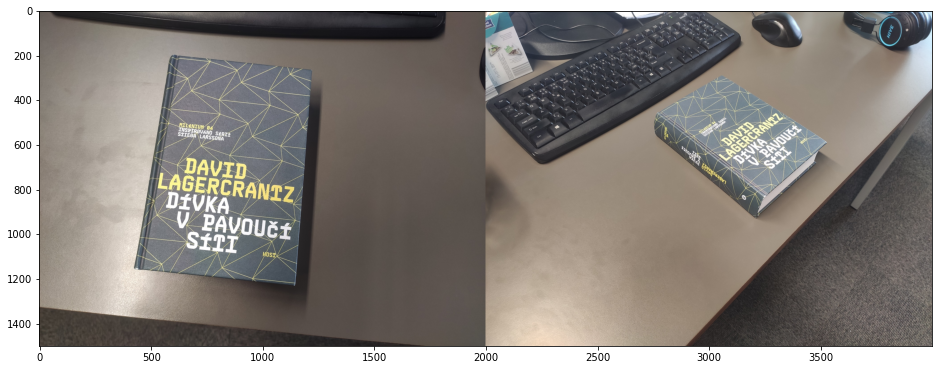

In [10]:
def read(path):
  # Read the image
  image = cv2.imread(path)
 
  # Convert BGR to RGB so it can be visualized by pyplot properly
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
  # Replace black pixels (0,0,0) by ultra dark grey pixels (1,1,1)
  # because black pixels are treated as transparent when combining images  
  image[np.where((image == [0,0,0]).all(axis=-1))] = [1,1,1]
 
  return image
 
def show(first_image, second_image=None, points=None, colors=None):
  image = first_image
 
  # Set sizes of the output figure
  plt.rcParams["figure.figsize"] = (8, 8)
  first_image_width = image.shape[1]
 
  # If the second_image is specified, it is concatenated to the first one
  if second_image is not None:
    # Calculate the shape of resulting image
    h1, w1 = first_image.shape[:2]
    h2, w2 = second_image.shape[:2]
    combined_shape = [max(h1, h2), w1 + w2, 3]

    # Create new image with white pixels
    image = np.full(combined_shape, 255, dtype=np.uint8)
    # Place 'first_image'
    image[:h1,:w1,:] = first_image
    # Place 'second_image'
    image[:h2,w1:w1+w2,:] = second_image

    # Increase sizes of the output figure
    plt.rcParams["figure.figsize"] = (16, 16)
 
  # Define colours if not specified
  if points is not None and colors is None:
    colors = [(32, 192, 32)] * len(points)
 
  # Draw lines between the corresponding points
  if points is not None and colors is not None:
    for (point1, point2), color in zip(points, colors):
      p1_x, p1_y = point1
      p2_x, p2_y = point2
 
      # If the second_image is specified, add the width of the first_image 
      # to the second point so the second point remains in the second_image
      if second_image is not None:
        p2_x += first_image_width
 
      # Draw line between the points
      image = cv2.line(image, (p1_x, p1_y), (p2_x, p2_y), color, thickness=5)
 
  plt.imshow(image)
  plt.show()

show(read("photo_1.1.jpg"), read("photo_1.2.jpg"))

## Calculate homography and warp image

The following function processes images by first calculating the homography using `points1` and `points2` and then by transforming `image1` using the calculated homography matrix.

### Your task:
* Use the [`cv2.findHomography`](https://docs.opencv.org/4.5.2/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) function to calculate the homography between `points1` and `points2`.
* Warp (transform) `image1` using the [`cv2.warpPerspective`](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) function and the calculated homography. 
* You can also be inspired by tutorials, for example: [`learnopencv`](https://learnopencv.com/feature-based-image-alignment-using-opencv-c-python/), [`pythonpool`](https://www.pythonpool.com/cv2-findhomography/)

In [11]:
def process_images(image1, image2, points1, points2):
  homography, _ = cv2.findHomography(points1, points2)
  resulting_image = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))
  return homography, resulting_image

## Homography #1

In this first task, the correspoinding points are specified (table below).

### Your task:

* Using the `process_images` function calculate the homography between images `photo_1.1.jpg` (image A) and `photo_1.2.jpg` (image B) and align image A to image B and vice versa.

Corresponding points:

Image A        | Image B
:-------------:|:------------:
`[628, 200]`   | `[785, 447]`
`[1222, 264]`  | `[1057, 285]`
`[1144, 1227]` | `[1527, 588]`
`[468, 1156]`  | `[1263, 820]`

Result of the first code section:

![Homography #1 - Visualized lines](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_1_lines.png "Homography #1 - Visualized lines")


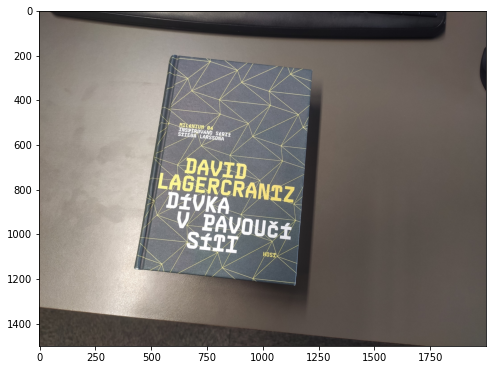

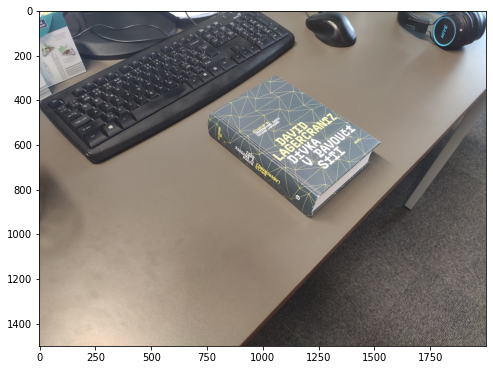

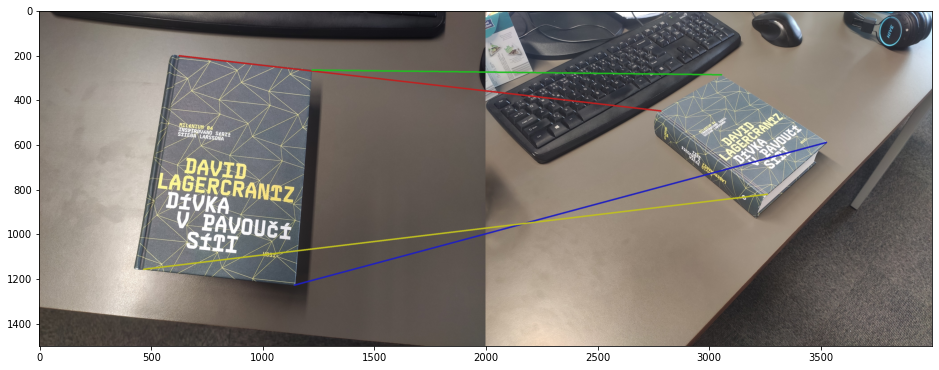

In [13]:
image_11 = read('photo_1.1.jpg')
image_12 = read('photo_1.2.jpg')

show(image_11)
show(image_12)

# red, green, blue, yellow
colors = [(192, 32, 32), (32, 192, 32), (32, 32, 192), (192, 192, 32)]
points_11 = np.array([[628, 200],[1222, 264], [1144, 1227], [468, 1156]])  ### FILL
points_12 = np.array([[785,447],[1057, 285],[1527, 588],[1263, 820]])  ### FILL
points = list(zip(list(points_11), list(points_12)))

show(image_11, image_12, points=points, colors=colors)

### Align image A to image B

<!-- -->|Homography matrix|<!-- -->
---:|:---:|:---
`[[ 6.60387518e-01`|`6.04278980e-01`|`3.45912276e+02]`
` [-2.86580167e-01`|`3.46205409e-01`|`6.12676067e+02]`
` [ 2.02034645e-04`|`-1.97936687e-05`|`1.00000000e+00]]`

![Homography #1 - Image A aligned to image B](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_1_AB.png "Homography #1 - Image A aligned to image B")


[[ 6.60387518e-01  6.04278980e-01  3.45912276e+02]
 [-2.86580167e-01  3.46205409e-01  6.12676067e+02]
 [ 2.02034645e-04 -1.97936687e-05  1.00000000e+00]]


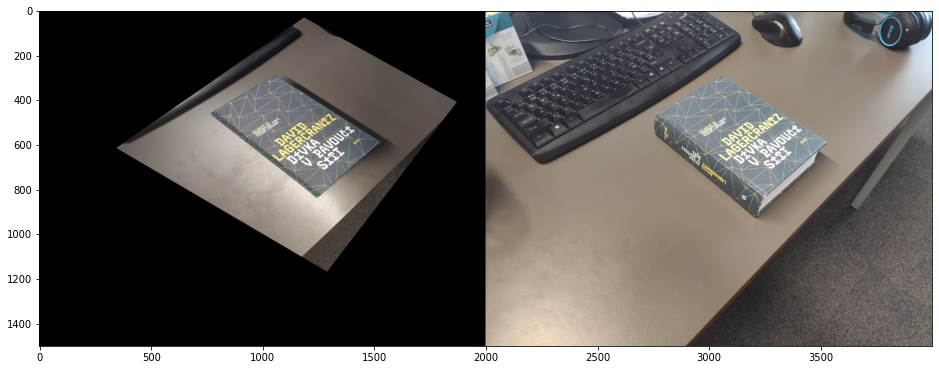

In [14]:
homography_11, resulting_image_11 = process_images(image_11, image_12, points_11, points_12)
print(homography_11)
show(resulting_image_11, image_12)

### Align image B to image A

<!-- -->|Homography matrix|<!-- -->
---:|:---:|:---
`[[ 8.91809004e-01`|`-1.52095474e+00`|`6.23364886e+02]`
`[ 1.02129858e+00`|`1.46962475e+00`|`-1.25368363e+03]`
`[-1.59961070e-04`|`3.36374817e-04`|`1.00000000e+00]]`

![Homography #1 - Image B aligned to image A](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_1_BA.png "Homography #1 - Image B aligned to image A")

[[ 8.91809004e-01 -1.52095474e+00  6.23364886e+02]
 [ 1.02129858e+00  1.46962475e+00 -1.25368363e+03]
 [-1.59961070e-04  3.36374817e-04  1.00000000e+00]]


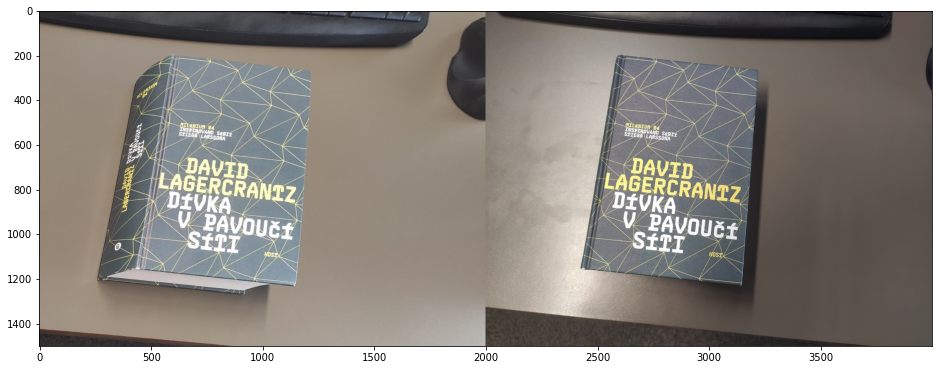

In [15]:
homography_12, resulting_image_12 = process_images(image_12, image_11, points_12, points_11)
print(homography_12)
show(resulting_image_12, image_11)

## Homography #2

In this task you have to measure/estimate/guess the corresponding points coordinates.

### Your task:

* Using the `process_images` function calculate the homography between images `photo_2.1.jpg` (image A) and `photo_2.3.jpg` (image B) and align image A to image B and vice versa.

Result of the first code section:
![Homography #2 - Visualized lines](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_2_lines.png "Homography #2 - Visualized lines")

In [ ]:
image_21 = read('photo_2.1.jpg')
image_22 = read('photo_2.2.jpg')

show(image_21)
show(image_22)

colors = [(192, 32, 32), (32, 192, 32), (32, 32, 192), (192, 192, 32)]
points_21 = ### FILL
points_22 = ### FILL
points = list(zip(list(points_21), list(points_22)))

show(image_21, image_22, points=points, colors=colors)

### Align image A to image B

<!-- -->|Homography matrix|<!-- -->
---:|:---:|:---
`[[ 4.34705770e-01`|`5.18865644e+00`|`-7.42119984e+02]`
` [-1.84532609e+00`|`-8.22001710e-02`|`3.35641595e+03]`
` [ 1.09277801e-03`|`1.42224414e-03`|`1.00000000e+00]]`

![Homography #2 - Image A aligned to image B](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_2_AB.png "Homography #2 - Image A aligned to image B")

In [ ]:
homography_21, resulting_image_21 = ### FILL
print(homography_21)
show(resulting_image_21, image_22)

### Align image B to image A

<!-- -->|Homography matrix|<!-- -->
---:|:---:|:---
`[[-5.09049974e-01`|`-6.54587741e-01`|`1.81929258e+03]`
` [ 5.77956407e-01`|`1.30587506e-01`|`-9.39298966e+00]`
` [-2.65716495e-04`|`5.29591772e-04`|`1.00000000e+00]]`

![Homography #2 - Image B aligned to image A](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_2_BA.png "Homography #2 - Image B aligned to image A")

In [ ]:
homography_22, resulting_image_22 = ### FILL
print(homography_22)
show(resulting_image_22, image_21)

## Homography #3

Basically the same task as the previous one, but with one extra step at the end (Image modification).

### Your task:

* Using the `process_images` function calculate the homography between images `photo_2.1.jpg` (image A) and `photo_2.3.jpg` (image B) and align image A to image B and vice versa.

Result of the first code section:
![Homography #3 - Visualized lines](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_3_lines.png "Homography #3 - Visualized lines")

In [ ]:
image_21 = read('photo_2.1.jpg')
image_23 = read('photo_2.3.jpg')

show(image_21)
show(image_23)

colors = [(192, 32, 32), (32, 192, 32), (32, 32, 192), (192, 192, 32)]
points_21 = ### FILL (Same points as in the Homography #2)
points_23 = ### FILL
points = list(zip(list(points_21), list(points_23)))

show(image_21, image_23, points=points, colors=colors)

### Align image A to image B

![Homography #3 - Image A aligned to image B](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_3_AB.png "Homography #3 - Image A aligned to image B")

In [ ]:
homography_31, resulting_image_31 = ### FILL
print(homography_31)
show(resulting_image_31, image_23)

### Align image B to image A

![Homography #3 - Image B aligned to image A](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_3_BA.png "Homography #3 - Image B aligned to image A")

In [ ]:
homography_32, resulting_image_32 = ### FILL
print(homography_32)
show(resulting_image_32, image_21)

### Image modification

In [ ]:
# Function to combine two images. Black color ([0,0,0]) is used as transparency channel
def combine_images(first_image, second_image):
  image = np.copy(first_image)

  # Calculate mask from the black pixels in the second image
  mask = second_image != [0,0,0]

  # Copy pixels from second image to the copy of first image based on the mask
  image[np.where(mask)] = second_image[np.where(mask)]

  return image
  
show(combine_images(image_21, resulting_image_32))

## Homography #4

In this last exercise, your task is to take a photo (content depends on you), find the corresponding points between the TV (or photo frame on the left) in the photo_3.1.jpg file and your photo, and replace the TV (or photo frame) content with your photo as realistically as possible. As the TV's aspect ratio is 16:9, your photo should also follow this ratio (does NOT apply for the photo frame).

Results:

![Homography #4 - Visualized lines](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_4_lines.png "Homography #4 - Visualized lines")

![Homography #4 - Result](https://www.fit.vutbr.cz/~ikiss/bissit21/homography_4_result.png "Homography #4 - Result")

In [ ]:
image_31 = read('photo_3.1.jpg')
image_32 = read('photo_3.2.jpg') ## Your photo

colors = [(192, 32, 32), (32, 192, 32), (32, 32, 192), (192, 192, 32)]
points_31 = ### FILL
points_32 = ### FILL
points = list(zip(list(points_31), list(points_32)))

show(image_31, image_32, points=points, colors=colors)

homography_41, resulting_image_41 = ### FILL
show(combine_images(image_31, resulting_image_41))